In [1]:
import numpy as np
from scipy.ndimage import shift
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
sys.path.insert(0, '/home/sudat/athena/vis/python')
import athena_read

In [7]:
datap1 = np.genfromtxt(f'/home/sudat/cca/fixed/single_fixed/disk.hst')
data2p1 = athena_read.athdf(f'/home/sudat/cca/fixed/single_fixed/disk.out1.00800.athdf')
timep1 = datap1[:,0]
#sum_torquep1 = datap1[:,10]

densp1 = data2p1.get('dens')[0]
rp1 = data2p1.get('x1v')
phip1 = data2p1.get('x2v')
time2p1 = data2p1.get('Time')
phip1_c = data2p1.get('x2f')
rp1_c = data2p1.get('x1f')

phip1 = phip1[:,None]
d_phip1 = phip1_c[:, None]
d_phip1 = d_phip1[1:] - d_phip1[:-1]
d_rp1 = rp1_c[1:] - rp1_c[:-1]

In [2]:
data = np.genfromtxt('/home/sudat/test/a1d2/disk.hst')
data2 = athena_read.athdf('/home/sudat/test/a1d4/disk.out1.00750.athdf')
time = data[:,0] / (2*np.pi)
sum_torque1 = data[:,10]
ilt1 = data[:, 11]
olt1 = data[:,12]
sum_torque2 = data[:,13]
ilt2 = data[:,14]
olt2 = data[:,15]

dens = data2.get('dens')[0]
r = data2.get('x1v')
phi = data2.get('x2v')
time2 = data2.get('Time')
phi_c= data2.get('x2f')
r_c = data2.get('x1f')

phi = phi[:,None]
d_phi = phi_c[:, None]
d_phi = d_phi[1:] - d_phi[:-1]
d_r = r_c[1:] - r_c[:-1]

In [9]:
#Orbital distance of Planet 1 and Planet 2
p_r1 = 1.0
p_r2 = 1.4

In [10]:
'''Conversion from Polar -> Cartesian'''
xp1 = rp1_c[None,:] * np.cos(phip1_c[:,None])
yp1 = rp1_c[None,:] * np.sin(phip1_c[:, None])

In [11]:
'''Conversion from Polar -> Cartesian'''
x = r_c[None,:] * np.cos(phi_c[:,None])
y = r_c[None,:] * np.sin(phi_c[:, None])

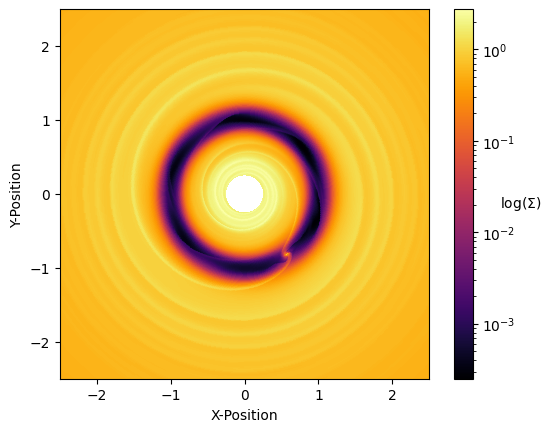

In [12]:
plt.pcolormesh(xp1, yp1, densp1, cmap='inferno', norm='log')
plt.xlabel('X-Position')
plt.ylabel('Y-Position')
plt.axis('square')
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.colorbar().set_label(r'log($\Sigma$)', rotation=0)

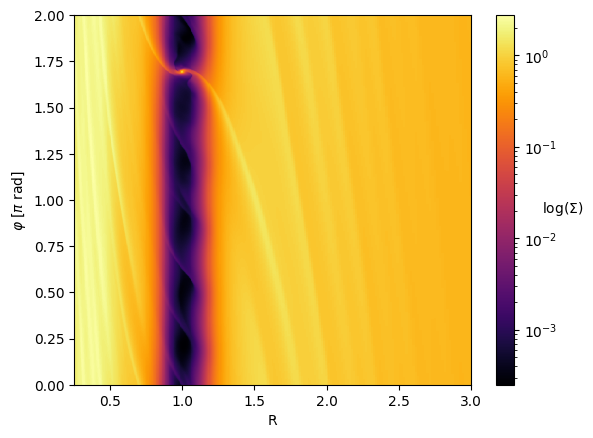

In [13]:
R, PHI = np.meshgrid(rp1_c, phip1_c)
plt.pcolormesh(R, PHI/(np.pi), densp1, norm='log', cmap='inferno')
plt.ylabel(r'$\varphi$ [$\pi$ rad]')
plt.xlabel('R')
plt.xlim(0.25,3)
plt.colorbar().set_label(r'log($\Sigma$)', rotation=0)

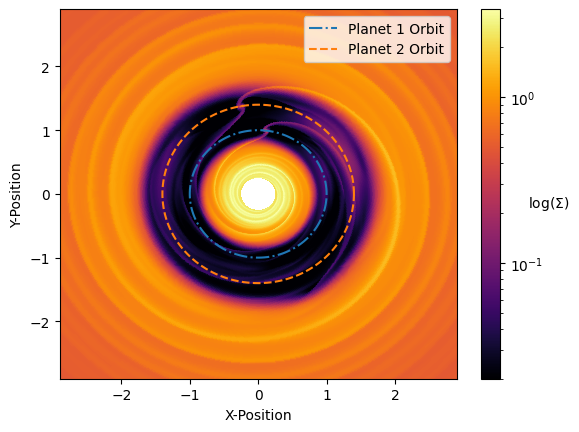

In [14]:
# Plot surface density
plt.pcolormesh(x, y, dens, cmap='inferno', norm='log', vmin= 0.02) 
plt.xlabel('X-Position')
plt.ylabel('Y-Position')
plt.xlim(-(p_r2 + 1.5), p_r2 + 1.5)
plt.ylim(-(p_r2 + 1.5), p_r2 + 1.5)
plt.colorbar().set_label(r'log($\Sigma$)', rotation=0)

# Plot orbits
theta = np.linspace(0, 2 * np.pi, 150)
a1 = p_r1 * np.cos(theta)
b1 = p_r1 * np.sin(theta)
a2 = (p_r2) * np.cos(theta)
b2 = (p_r2) * np.sin(theta)

plt.plot(a1, b1, linestyle='-.', label="Planet 1 Orbit")
plt.plot(a2, b2, linestyle='dashed', label="Planet 2 Orbit")
plt.legend()

In [15]:
thermal_mass = (0.05)**3
jupiter_mass = 0.000954588
saturn_mass = 0.000285716656
Q_j = (jupiter_mass/thermal_mass)
Q_s = (saturn_mass/thermal_mass)

def shock(j_r, s_r):
    l_sh_j = 0.93 * 0.05 * (j_r) ((1.66667 + 1) / (12/5) * (Q_j))**(-2/5)
    l_sh_s = 0.93 * 0.05*(s_r) * ((1.66667 + 1) / (12/5) * (Q_s))**(-2/5)
    return l_sh_j, l_sh_s

def horseshoe(j_r, s_r):
    x_j = 0.05 * (j_r)*((1.05 * Q_j**(1/2) + 3.4*Q_j**(7/3)) / (1 + 2*Q_j**(2)))
    x_s = 0.05 *(s_r)*((1.05 * Q_s**(1/2) + 3.4*Q_s**(7/3)) / (1 + 2*Q_s**(2)))
    return x_j, x_s

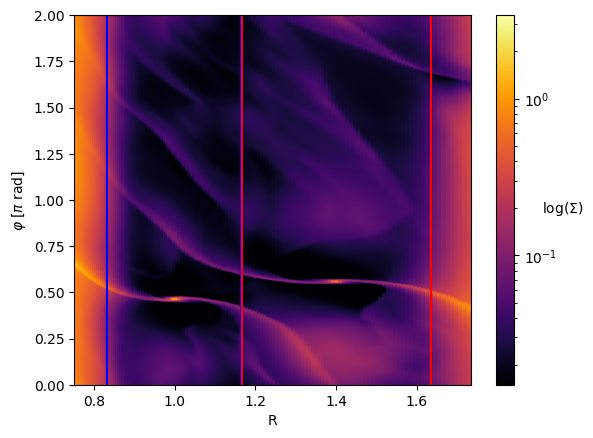

In [16]:
R, PHI = np.meshgrid(r_c, phi_c)
plt.pcolormesh(R, PHI/(np.pi), dens, norm='log', cmap='inferno', vmin=0.015)
plt.ylabel(r'$\varphi$ [$\pi$ rad]')
plt.xlabel('R')
plt.xlim(0.75,p_r2+horseshoe(p_r2,0)[0]+0.1)
plt.colorbar().set_label(r'log($\Sigma$)', rotation=0)


plt.vlines(p_r1 - horseshoe(p_r1,0)[0],0,2, color='blue')
plt.vlines(p_r1 + horseshoe(p_r1,0)[0] - 0.0025,0,2, color='blue')
plt.vlines(p_r2 - horseshoe(p_r2, 0)[0], 0,2, color='red')
plt.vlines(p_r2 + horseshoe(p_r2, 0)[0],0,2, color='red')

Total Torque:
$$\Gamma = \iint_{S} \vec{r} \times \vec{g} \, dm \Rightarrow \iint_{S} \Sigma (r, \phi) |\vec{r}| |\vec{g}| \sin\theta \, dA \Rightarrow \iint_{S} \Sigma (r, \phi) r^2 |\vec{g}| \sin\theta \, dr d\phi$$
$$\Gamma_{\Sigma} = \Sigma (r, \phi) |\vec{g}| \sin\theta$$

Torque per unit radius:
$$\frac{\partial \Gamma}{\partial r} = r^2 \int \Sigma (r, \phi) |\vec{g}| \sin\theta \, d\phi \Rightarrow r^2 \int \Gamma_{\Sigma} \, d\phi$$

Torque per unit mass:
$$\frac{dm}{dr} = 2 \pi r \Sigma(r)$$
$$\frac{\partial \Gamma}{\partial m} = \frac{\partial \Gamma}{\partial r} / \frac{dm}{dr}$$ 
$$\frac{\partial \Gamma}{\partial m} = \frac{r}{2 \pi \Sigma(r)} \int \Sigma (r, \phi) |\vec{g}| \sin\theta \, d\phi $$

$$\Gamma = \int \frac{\partial \Gamma}{\partial r} \, dr$$

Torque per unit mass:
$$\frac{dm}{dr} = 2 \pi r \Sigma(r)$$
$$\frac{\partial \Gamma}{\partial m} = \frac{\partial \Gamma}{\partial r} / \frac{dm}{dr}$$ 
$$\frac{\partial \Gamma}{\partial m} = \frac{r}{2 \pi \Sigma(r)} \int \Sigma (r, \phi) |\vec{g}| \sin\theta \, d\phi $$

To find the radial inner Lindblad Torque and radial outer Lindblad Torque we solve the following integral relations:
$$\Gamma_{ILT} = \int_{0}^{2 \pi}\int_{R_{min}}^{x_{HS,inner}} \Sigma(r,\varphi) |\vec{r}| |\vec{g}| \sin\theta \, dA$$
$$\Gamma_{OLT} = \int_{0}^{2 \pi}\int_{x_{HS,outer}}^{R_{max}} \Sigma(r,\varphi) |\vec{r}| |\vec{g}| \sin\theta \, dA$$
$$\Gamma_{HD} = \Gamma - \Gamma_{OLT} - \Gamma_{ILT}$$

In [17]:
def initial(r, phi, time2, rp, gm_planet, gm_planet2):
    epsilon = 0.3
    gm0 = 1.0
    R_H = rp*np.cbrt(gm_planet/(3*gm0))
    period = 2*np.pi* np.sqrt(rp**3 / (gm0+gm_planet+gm_planet2))
    phip = 2 * (np.pi / period) * time2
    d = np.sqrt(pow(rp,2) + pow(r,2) - 2*rp*r*np.cos(phi - phip))
    g_mag = -1*((gm_planet*d) / (np.sqrt(pow(pow(d,2) + pow(epsilon,2)*pow(R_H,2), 3))))
    sine_term = (r*rp*np.cos(phi)*np.sin(phip) - r*rp*np.sin(phi)*np.cos(phip)) / (r*d)
    return g_mag, sine_term, d, R_H

In [18]:
'''Planet 1 One-Planet Simulation'''
sum_r_torque = 0
sum_r_torque_dm = 0
for i in range(566,800,5):
    data = athena_read.athdf(f'/home/sudat/cca/fixed/single_fixed/disk.out1.00{i}.athdf')
    dens = data.get('dens')[0]
    r = data.get('x1v')
    phi = data.get('x2v')
    time2 = data.get('Time')
    d_phi= data.get('x2f')
    d_r = data.get('x1f')

    phi = phi[:,None]
    d_phi = d_phi[:, None]
    d_phi = d_phi[1:] - d_phi[:-1]
    d_r = d_r[1:] - d_r[:-1]

    g_mag = initial(r, phi, time2, p_r1, jupiter_mass,0)[0]
    sine_term = initial(r, phi, time2, p_r1, jupiter_mass,0)[1]
    #d = initial(r, phi, time2, 1, 0.000954588)[2]
    #dens[d<0.5*initial(r, phi, time2, 1, 0.000954588)[3]] = 0
 
    sum_r_torque += r**2*np.sum(dens * g_mag * sine_term * d_phi, axis=0)
    sum_r_torque_dm += (r / (2 * np.pi * np.average(dens, axis=0))) * np.sum(dens * g_mag * sine_term * d_phi, axis=0)

r_torque_avgp1 = 2*np.pi*(sum_r_torque/len(range(566,800,5)))
r_torque_dm = sum_r_torque_dm/len(range(566,800,5))

KeyboardInterrupt: 

In [ ]:
'''Planet 1 Two-Planet Simulation'''
sum_r_torque = 0
sum_r_torque_dm = 0
for i in range(566,800,5):
    data = athena_read.athdf(f'/home/sudat/cca/fixed/jupiter-jupiter/a1d5_fixed/disk.out1.00{i}.athdf')
    dens = data.get('dens')[0]
    r = data.get('x1v')
    phi = data.get('x2v')
    time2 = data.get('Time')
    d_phi= data.get('x2f')
    d_r = data.get('x1f')

    phi = phi[:,None]
    d_phi = d_phi[:, None]
    d_phi = d_phi[1:] - d_phi[:-1]
    d_r = d_r[1:] - d_r[:-1]

    g_mag = initial(r, phi, time2, p_r1, jupiter_mass,0)[0]
    sine_term = initial(r, phi, time2, p_r1, jupiter_mass,0)[1]
    #d = initial(r, phi, time2, 1, 0.000954588)[2]
    #dens[d<0.5*initial(r, phi, time2, 1, 0.000954588)[3]] = 0
 
    sum_r_torque += r**2*np.sum(dens * g_mag * sine_term * d_phi, axis=0)
    sum_r_torque_dm += (r / (2 * np.pi * np.average(dens, axis=0))) * np.sum(dens * g_mag * sine_term * d_phi, axis=0)

r_torque_avg_p1 = 2*np.pi*(sum_r_torque/len(range(566,800,5)))
r_torque_dmp1 = sum_r_torque_dm/len(range(566,800,5))

In [ ]:
'''Planet 2'''
sum_r_torque = 0
for i in range(566,800,5):
    data = athena_read.athdf(f'/home/sudat/cca/fixed/jupiter-jupiter/a1d5_fixed/disk.out1.00{i}.athdf')
    dens = data.get('dens')[0]
    r = data.get('x1v')
    phi = data.get('x2v')
    time2 = data.get('Time')
    d_phi= data.get('x2f')
    d_r = data.get('x1f')

    phi = phi[:,None]
    d_phi = d_phi[:, None]
    d_phi = d_phi[1:] - d_phi[:-1]
    d_r = d_r[1:] - d_r[:-1]

    g_mag = initial(r, phi, time2, p_r2, jupiter_mass, jupiter_mass)[0]
    sine_term = initial(r, phi, time2, p_r2, jupiter_mass, jupiter_mass)[1]
    #d = initial(r, phi, time2, 1.5, 0.000954588)[2]
    #dens[d<0.5*initial(r, phi, time2, 1.5, 0.000954588)[3]] = 0
    sum_r_torque += r**2*np.sum(dens * g_mag * sine_term * d_phi, axis=0)
    sum_r_torque_dm += (r / (2 * np.pi * np.average(dens, axis=0))) * np.sum(dens * g_mag * sine_term * d_phi, axis=0)

r_torque_avg_p2 = 2*np.pi*(sum_r_torque / len(range(566,800,5)))
r_torque_dmp2 = sum_r_torque_dm/len(range(566,800,5))

$$\sigma = \sqrt{\frac{\sum (\Gamma - \langle \Gamma \rangle)^2}{N-1}}$$
$$\sum \delta = \sqrt{\delta_1^{2} + \delta_2^2 + \delta_3^2 + ...}$$

In [ ]:
sum_error = 0
first_file = 566
last_file = 800
frequency = 2
for i in range(first_file, last_file, frequency):
    data = athena_read.athdf(f'/home/sudat/cca/fixed/jupiter-jupiter/a2_fixed/disk.out1.00{i}.athdf')
    dens = data.get('dens')[0]
    r = data.get('x1v')
    phi = data.get('x2v')
    time2 = data.get('Time')
    d_phi= data.get('x2f')
    d_r = data.get('x1f')

    phi = phi[:,None]
    d_phi = d_phi[:, None]
    d_phi = d_phi[1:] - d_phi[:-1]
    d_r = d_r[1:] - d_r[:-1]

    g_mag = initial(r, phi, time2, p_r1, jupiter_mass, 0)[0]
    sine_term = initial(r, phi, time2, p_r1, jupiter_mass, 0)[1]

    gamma_i = 2*np.pi*np.cumsum((r**2*np.sum(dens * g_mag * sine_term * d_phi, axis=0)) * d_r)
    gamma_avg = np.cumsum(r_torque_avg_p1 * d_r)
    sum_error += (gamma_i - gamma_avg)**2
    
standard_deviation = np.sqrt(sum_error / (116*117))

KeyboardInterrupt: 

$$\frac{\partial \Gamma_{\nu}}{\partial r} = 3 \pi \nu \Sigma r^2 \Omega$$

In [ ]:
GM = 1.0
keplerian_vel = np.sqrt(GM / r**3)
nu = 0.001 * (0.05*r)**2 * keplerian_vel
density_initial = (r)**(-1/2)
viscous_torque = (2*np.pi)*3 * np.pi * nu * density_initial * r**2 * keplerian_vel
#remove pi factor

In [ ]:
sum_dens_onesim = 0
for i in range(600,800,10):
    data = athena_read.athdf(f'/home/sudat/cca/fixed/single_fixed/disk.out1.00{i}.athdf')
    density = data.get('dens')[0]
    #d = initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), 1.0, 0.000954588, 0.000954588)[2]
    #density[d < 0.45 * initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), 1.0, 0.000954588,0.000954588)[3]] = 0
    sum_dens_onesim += density

sum_dens_avg_onesim = sum_dens_onesim/len(range(600,800,10))

In [ ]:
sum_dens_planet1 = 0
for i in range(600,800,10):
    data = athena_read.athdf(f'/home/sudat/test/a1d2/disk.out1.00{i}.athdf')
    density = data.get('dens')[0]
    #d = initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), 1.0, 0.000954588, 0.000954588)[2]
    #density[d < 0.45 * initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), 1.0, 0.000954588,0.000954588)[3]] = 0
    sum_dens_planet1 += density

sum_dens_avg_planet1 = sum_dens_planet1/len(range(600,800,10))

In [ ]:
sum_dens_planet2 = 0
for i in range(600,800,10):
    data = athena_read.athdf(f'/home/sudat/cca/fixed/jupiter-jupiter/a1d3_fixed/disk.out1.00{i}.athdf')
    density = data.get('dens')[0]
    #d = initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), 1.5, 0.000954588)[2]
    #density[d < 1.0 * initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), 1.5, 0.000954588)[3]] = 0.004
    #d = initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), 1.0, 0.000954588)[2]
    #density[d < 1.0 * initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), 1.0, 0.000954588)[3]] = 0.004
    sum_dens_planet2 += density

sum_dens_avg_planet2 = sum_dens_planet2/len(range(600,800,10))

In [ ]:
sum_dens_planet3 = 0
for i in range(600,800,10):
    data = athena_read.athdf(f'/home/sudat/test/a1d4/disk.out1.00{i}.athdf')
    density = data.get('dens')[0]
    #d = initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), 1.5, 0.000954588)[2]
    #density[d < 1.0 * initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), 1.5, 0.000954588)[3]] = 0.004
    #d = initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), 1.0, 0.000954588)[2]
    #density[d < 1.0 * initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), 1.0, 0.000954588)[3]] = 0.004
    sum_dens_planet3 += density

sum_dens_avg_planet3 = sum_dens_planet3/len(range(600,800,10))

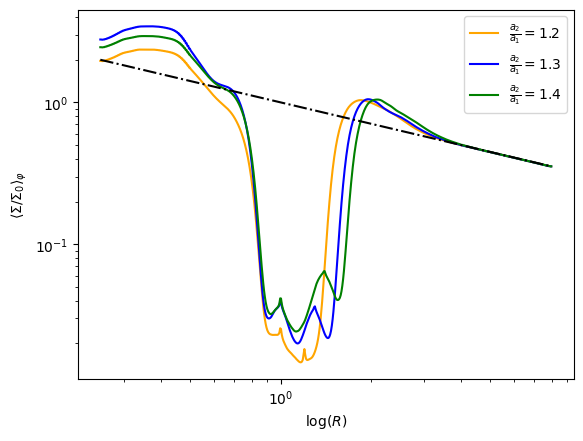

In [ ]:
plt.plot(r, np.average(sum_dens_avg_planet1, axis = 0), label = r'$\frac{a_2}{a_1} = 1.2$' , color='orange')
plt.plot(rp1, np.average(sum_dens_avg_planet2, axis = 0), label= r'$\frac{a_2}{a_1} = 1.3$', color='blue')
plt.plot(rp1, np.average(sum_dens_avg_planet3, axis = 0), label= r'$\frac{a_2}{a_1} = 1.4$', color='green')
plt.plot(r, (r)**(-1/2), linestyle= '-.', c='black')
#plt.text(5, 0.335, r'$\Sigma = \Sigma_0 (\frac{r}{r_p})^{- 0.5}$')
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\langle {\Sigma}/{\Sigma_{0}}\rangle_{\varphi}$')
plt.xlabel(r'log($R$)')

plt.legend()

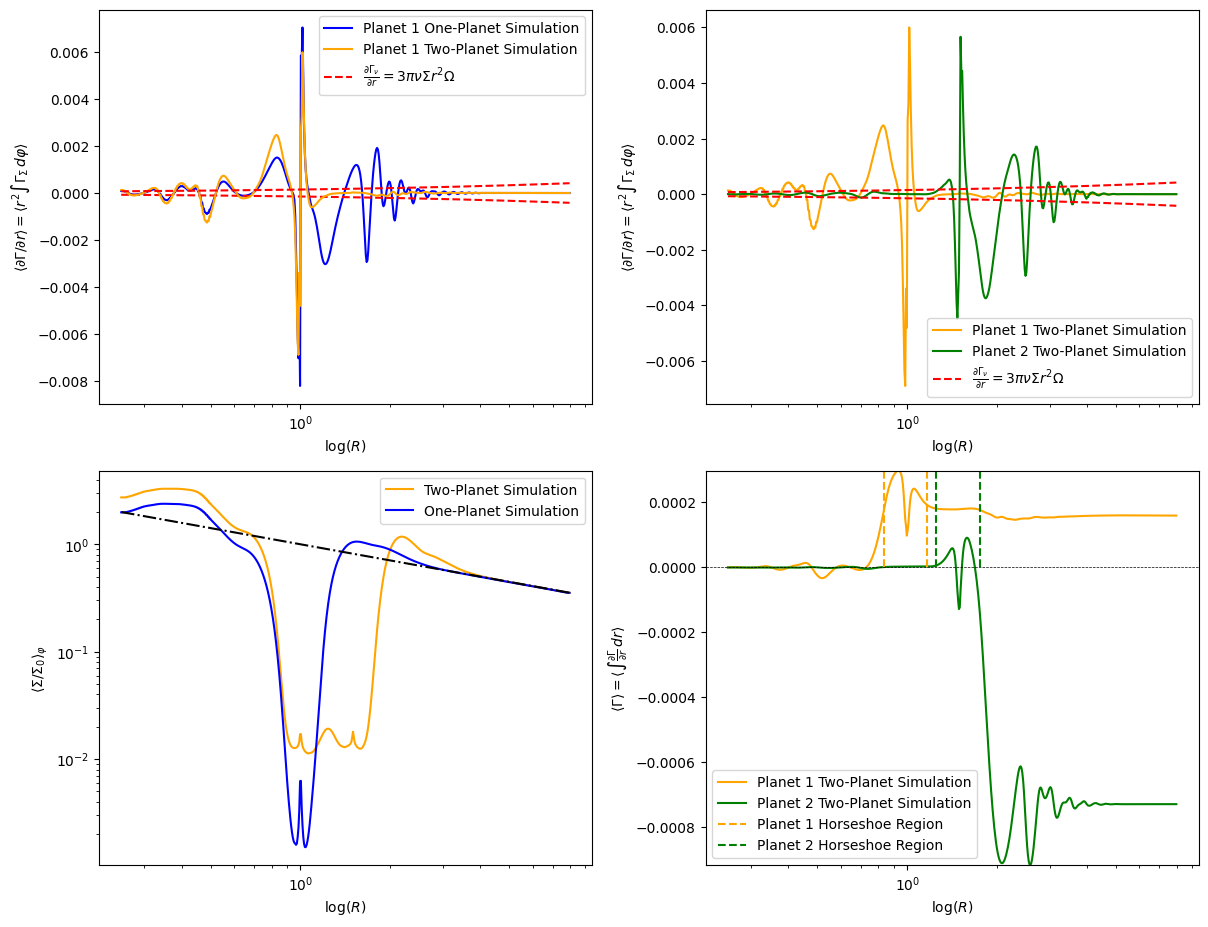

In [ ]:
plt.figure(figsize=(9.75*1.25,7.5*1.25))

plt.subplot(221)
plt.plot(rp1, (r_torque_avgp1), label= 'Planet 1 One-Planet Simulation', color='blue')
plt.plot(r, -1*(viscous_torque), color='red', linestyle='dashed', linewidth=1.5)
plt.plot(r, (r_torque_avg_p1), label='Planet 1 Two-Planet Simulation', color='orange')
plt.plot(r, (viscous_torque), color='red', label = r'$\frac{\partial \Gamma_\nu}{\partial r} = 3 \pi \nu \Sigma r^2 \Omega$', linestyle='dashed', linewidth=1.5)
plt.xlabel(r'log($R$)')
plt.xscale('log')

plt.ylabel(r'$\langle {\partial \Gamma} / {\partial r} \rangle = \langle r^2 \int \Gamma_{\Sigma} \, d\varphi \rangle$')
plt.legend()

plt.subplot(222)
plt.plot(r, (r_torque_avg_p1), label='Planet 1 Two-Planet Simulation', color='orange')
plt.plot(r, (r_torque_avg_p2), label= 'Planet 2 Two-Planet Simulation', color='green')
plt.plot(r, (viscous_torque), color='red', label = r'$\frac{\partial \Gamma_\nu}{\partial r} = 3 \pi \nu \Sigma r^2 \Omega$', linestyle='dashed', linewidth=1.5)
plt.plot(r, -1*(viscous_torque), color='red', linestyle='dashed', linewidth=1.5)
plt.xlabel(r'log($R$)')
plt.xscale('log')

plt.ylabel(r'$\langle {\partial \Gamma} / {\partial r} \rangle = \langle r^2 \int \Gamma_{\Sigma} \, d\varphi \rangle$')
plt.legend()

plt.subplot(223)
plt.plot(r, np.average(sum_dens_avg, axis = 0), label = 'Two-Planet Simulation', color='orange')
plt.plot(rp1, np.average(sum_dens_avg_onesim, axis = 0), label= 'One-Planet Simulation', color='blue')
plt.plot(r, (r)**(-1/2), linestyle= '-.', c='black')
#plt.text(5, 0.335, r'$\Sigma = \Sigma_0 (\frac{r}{r_p})^{- 0.5}$')
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\langle {\Sigma}/{\Sigma_{0}}\rangle_{\varphi}$')
plt.xlabel(r'log($R$)')

plt.legend()

plt.subplot(224)   
#plt.plot(rp1, 2*np.pi*(np.cumsum(r_torque_avgp1 * d_rp1)), label='Planet 1 One-Planet Simulation', color='blue')
plt.plot(r, (np.cumsum(r_torque_avg_p1 * d_r)), label='Planet 1 Two-Planet Simulation', color='orange')
plt.plot(r, (np.cumsum(r_torque_avg_p2* d_r)), label='Planet 2 Two-Planet Simulation', color='green')
plt.axhline(y=0, linestyle='dashed', color='black', linewidth=0.5)
plt.ylabel(r'$\langle \Gamma \rangle = \langle \int \frac{\partial \Gamma}{\partial r} \, dr \rangle$')
plt.xlabel(r'log($R$)')
plt.xscale('log')
plt.ylim(np.min((np.cumsum(r_torque_avg_p2 * d_r))),np.max((np.cumsum(r_torque_avg_p1 * d_r))))
plt.vlines(p_r1 - horseshoe(p_r1,0)[0],0,np.max((np.cumsum(r_torque_avg_p1 * d_r))), linestyle='dashed', color='orange', label= "Planet 1 Horseshoe Region")
plt.vlines(p_r1 + horseshoe(p_r1,0)[0] - 0.0025,0,np.max((np.cumsum(r_torque_avg_p1 * d_r))), linestyle='dashed',color='orange')
plt.vlines(p_r2 - horseshoe(p_r2, 0)[0], 0,np.max((np.cumsum(r_torque_avg_p1 * d_r))), linestyle='dashed',color='green',label="Planet 2 Horseshoe Region")
plt.vlines(p_r2 + horseshoe(p_r2,0)[0],0,np.max((np.cumsum(r_torque_avg_p1 * d_r))), linestyle='dashed',color='green')

plt.legend(loc='lower left')

plt.tight_layout()

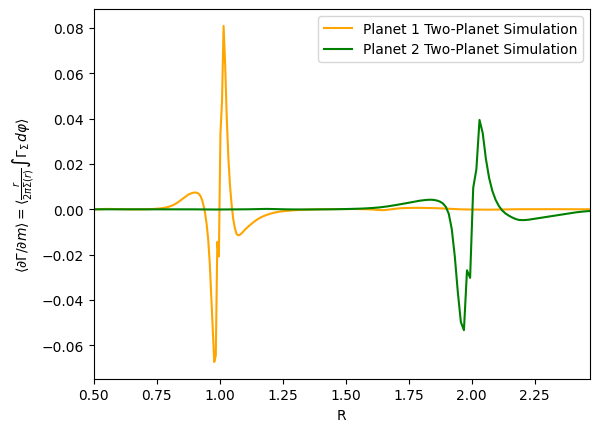

In [ ]:
plt.plot(r, (r_torque_avg_p1)/ ( 2 * np.pi * r * np.average(sum_dens_avg, axis = 0)), label='Planet 1 Two-Planet Simulation', color='orange')
plt.plot(r, (r_torque_avg_p2)/ ( 2 * np.pi * r * np.average(sum_dens_avg, axis = 0)), label= 'Planet 2 Two-Planet Simulation', color='green')
plt.xlabel(r'R')
plt.xlim(0.5,p_r2+horseshoe(0, p_r2)[1]+0.25)

plt.ylabel(r'$\langle {\partial \Gamma} / {\partial m} \rangle = \langle \frac{r}{2 \pi \Sigma(r)} \int \Gamma_{\Sigma} \, d\varphi \rangle$')
plt.legend()

In [ ]:
total_p1 = (np.cumsum(r_torque_avg_p1 * d_r))
total_p2 = (np.cumsum(r_torque_avg_p2* d_r))
inner_index1 = np.where(r < p_r1 - horseshoe(p_r1,0)[0])[-1][-1]
outer_index1 = np.where(r > p_r1 + horseshoe(p_r1,0)[0])[0][0]
inner_index2 = np.where(r < p_r2 - horseshoe(p_r2, 0)[0])[-1][-1]
outer_index2 = np.where(r > p_r2 + horseshoe(p_r2, 0)[0])[0][0]

temp1 = np.array([])
temp2 = np.array([])
for i in range(0, int((inner_index1/2))):
    if np.abs(total_p1[i]) < np.abs(total_p1[0]*1.25) and np.abs(total_p1[i]) > np.abs(total_p1[0]*0.75):
        temp1 = np.append(temp1, total_p1[i])
start1 = np.average(temp1)
for i in range(int(outer_index1/2), len(total_p1)):
    if np.abs(total_p1[i]) < np.abs(total_p1[-1]*1.25) and np.abs(total_p1[i]) > np.abs(total_p1[-1]*0.75):
        temp2 = np.append(temp2, total_p1[i])
end1 = np.average(temp2)

temp3 = np.array([])
temp4 = np.array([])
for i in range(0, int((inner_index2/2))):
    if np.abs(total_p2[i]) < np.abs(total_p2[0]*1.25) and np.abs(total_p2[i]) > np.abs(total_p2[0]*0.75):
        temp3 = np.append(temp3, total_p2[i])
start2 = np.average(temp3)
for i in range(int(outer_index2/2), len(total_p2)):
    if np.abs(total_p2[i]) < np.abs(total_p2[-1]*1.25) and np.abs(total_p2[i]) > np.abs(total_p2[-1]*0.75):
        temp4 = np.append(temp4, total_p2[i])
end2 = np.average(temp4)

In [ ]:
ilt_p1 = (total_p1[inner_index1] - start1)
dilt_p1 = np.sqrt(standard_deviation[inner_index1]**2 + standard_deviation[0]**2)
olt_p1 = end1 - total_p1[outer_index1]
dolt_p1 = np.sqrt(standard_deviation[-1]**2 + standard_deviation[outer_index1]**2)
hd_p1 = (total_p1[outer_index1] - total_p1[inner_index1])
dhd_p1 = np.sqrt(standard_deviation[outer_index1]**2 + standard_deviation[inner_index1]**2)
totaltorque_p1 = ilt_p1 + olt_p1 + hd_p1
dtotal_p1 = np.sqrt(dilt_p1**2 + dolt_p1**2 + dhd_p1**2)

ilt_p2 = total_p2[inner_index2] - start1
olt_p2 = end2 - total_p2[outer_index2]
hd_p2 = total_p2[outer_index2] - total_p2[inner_index2]
totaltorque_p2 = ilt_p2 + olt_p2 + hd_p2

print(f'Inner Lindblad Torque Planet 1: {ilt_p1}')
print(f'Outer Lindblad Torque Planet 1: {olt_p1} ')
print(f'Horseshoe Drag Planet 1: {hd_p1}')
print(f'Total Torque Planet 1: {totaltorque_p1}')

print(f'Inner Lindblad Torque Planet 2: {ilt_p2}')
print(f'Outer Lindblad Torque Planet 2: {olt_p2} ')
print(f'Horseshoe Drag Planet 2: {hd_p2}')
print(f'Total Torque Planet 2: {totaltorque_p2}')

Inner Lindblad Torque Planet 1: 0.000295871590072412
Outer Lindblad Torque Planet 1: -0.00028383540660695006 
Horseshoe Drag Planet 1: 1.7602801613999597e-05
Total Torque Planet 1: 2.963898507946154e-05
Inner Lindblad Torque Planet 2: 0.00021998455186300421
Outer Lindblad Torque Planet 2: -0.0006979962774670128 
Horseshoe Drag Planet 2: -0.00027393499585416203
Total Torque Planet 2: -0.0007519467214581706


$$\frac{\Delta_{gap}}{R_p} = 0.41 (\frac{M_p}{M_{*}})^{1/2} (\frac{h_p}{R_p})^{-3/4} \alpha^{-1/4}$$

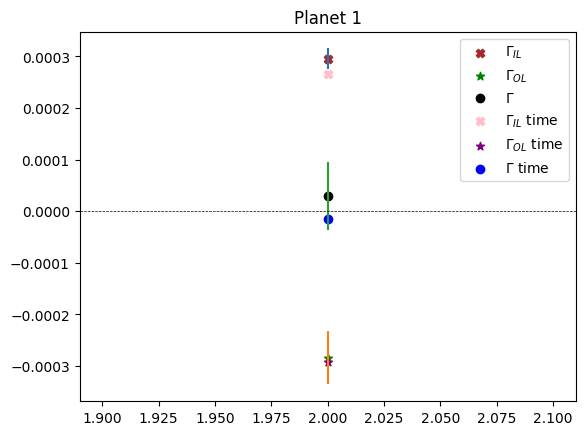

In [ ]:
plt.scatter(2.0, ilt_p1, label=r'$\Gamma_{IL}$', color='brown', marker='X')
plt.scatter(2.0, olt_p1, label=r'$\Gamma_{OL}$',  color='green', marker='*')
plt.scatter(2.0, totaltorque_p1, label=r'$\Gamma$', color='black', marker='o')

plt.scatter(2.0, m, label=r'$\Gamma_{IL}$ time', color='pink', marker='X')
plt.scatter(2.0, m2, label=r'$\Gamma_{OL}$ time',  color='purple', marker='*')
plt.scatter(2.0, m3, label=r'$\Gamma$ time', color='blue', marker='o')

plt.errorbar(2.0, ilt_p1, yerr=dilt_p1)
plt.errorbar(2.0, olt_p1, yerr=dolt_p1)
plt.errorbar(2.0, totaltorque_p1, yerr=dtotal_p1)

plt.title('Planet 1')

plt.axhline(y=0, linestyle='dashed', color='black', linewidth=0.5)

plt.legend()

1 gap width + orbital separation

In [ ]:
file = ['a1d1', 'a1d2', 'a1d3', '2to3_1J_1J', 'a1d4', 'a1d5', '1to2_1J_1J', 'a1d6', 'a1d7', 'a1d8', 'a1d9', 'a2', 'a2d1', 'a2d2', 'a2d3', 'a2d4', 'a2d5', 'a2d6', 'a2d7', 'a2d8', 'a2d9', 'a3']
inner1 = np.array([])
outer1 = np.array([])
final1 = np.array([])

inner2 = np.array([])
outer2 = np.array([])
final2 = np.array([])

for i in range(len(file)):
    data = np.genfromtxt(f'/home/sudat/test/{file[i]}/disk.hst')
    time = data[:,0] / (2*np.pi)
    time_test = time[11320:-1]
    sum_torque1 = data[:,10]
    ilt1 = data[:, 11]
    olt1 = data[:,12]
    sum_torque2 = data[:,13]
    ilt2 = data[:,14]
    olt2 = data[:,15]

    torque_integral_ilt = (np.cumsum(ilt1 * 0.5))[11320:-1]
    m,b = np.polyfit(time_test, torque_integral_ilt, deg=1)

    torque_integral_olt = (np.cumsum(olt1 * 0.5))[11320:-1]
    m2,b2 = np.polyfit(time_test, torque_integral_olt, deg=1)

    torque_integral = (np.cumsum(sum_torque1 * 0.5))[11320:-1]
    m3,b3 = np.polyfit(time_test, torque_integral, deg=1)

    inner1 = np.append(inner1, m)
    outer1 = np.append(outer1, m2)
    final1 = np.append(final1, m3)

    torque_integral_ilt2 = (np.cumsum(ilt2 * 0.5))[11320:-1]
    m4,b4 = np.polyfit(time_test, torque_integral_ilt2, deg=1)

    torque_integral_olt2 = (np.cumsum(olt2 * 0.5))[11320:-1]
    m5,b5 = np.polyfit(time_test, torque_integral_olt2, deg=1)

    torque_integral2 = (np.cumsum(sum_torque2 * 0.5))[11320:-1]
    m6,b6 = np.polyfit(time_test, torque_integral2, deg=1)

    inner2 = np.append(inner2, m4)
    outer2 = np.append(outer2, m5)
    final2 = np.append(final2, m6)

In [ ]:
file_saturn = ['a1d1_1J_1S', 'a1d2_1J_1S', 'a1d3_1J_1S', '2to3_1J_1S', 'a1d4_1J_1S', 'a1d5_1J_1S', '1to2_1J_1S', 'a1d6_1J_1S', 'a1d7_1J_1S', 'a1d8_1J_1S', 'a1d9_1J_1S', 'a2_1J_1S', 'a2d1_1J_1S', 'a2d2_1J_1S', 'a2d3_1J_1S', 'a2d4_1J_1S', 'a2d5_1J_1S', 'a2d6_1J_1S', 'a2d7_1J_1S', 'a2d8_1J_1S', 'a2d9_1J_1S', 'a3_1J_1S']
innerj1 = np.array([])
outerj1 = np.array([])
finalj1 = np.array([])

inners2 = np.array([])
outers2 = np.array([])
finals2 = np.array([])

for i in range(len(file)):
    data = np.genfromtxt(f'/home/sudat/test/{file_saturn[i]}/disk.hst')
    time = data[:,0] / (2*np.pi)
    time_test = time[11320:-1]
    sum_torque1 = data[:,10]
    ilt1 = data[:, 11]
    olt1 = data[:,12]
    sum_torque2 = data[:,13]
    ilt2 = data[:,14]
    olt2 = data[:,15]

    torque_integral_ilt = (np.cumsum(ilt1 * 0.5))[11320:-1]
    m,b = np.polyfit(time_test, torque_integral_ilt, deg=1)

    torque_integral_olt = (np.cumsum(olt1 * 0.5))[11320:-1]
    m2,b2 = np.polyfit(time_test, torque_integral_olt, deg=1)

    torque_integral = (np.cumsum(sum_torque1 * 0.5))[11320:-1]
    m3,b3 = np.polyfit(time_test, torque_integral, deg=1)

    innerj1 = np.append(innerj1, m)
    outerj1 = np.append(outerj1, m2)
    finalj1 = np.append(finalj1, m3)

    torque_integral_ilt2 = (np.cumsum(ilt2 * 0.5))[11320:-1]
    m4,b4 = np.polyfit(time_test, torque_integral_ilt2, deg=1)

    torque_integral_olt2 = (np.cumsum(olt2 * 0.5))[11320:-1]
    m5,b5 = np.polyfit(time_test, torque_integral_olt2, deg=1)

    torque_integral2 = (np.cumsum(sum_torque2 * 0.5))[11320:-1]
    m6,b6 = np.polyfit(time_test, torque_integral2, deg=1)

    inners2 = np.append(inners2, m4)
    outers2 = np.append(outers2, m5)
    finals2 = np.append(finals2, m6)

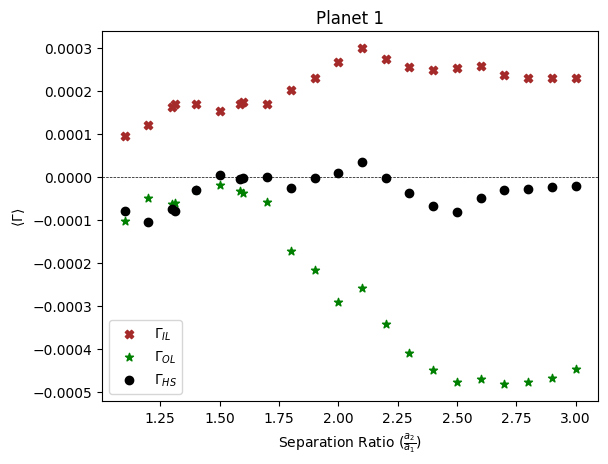

In [ ]:
sep = [1.1, 1.2, 1.3, np.cbrt(2.25), 1.4, 1.5, np.cbrt(4), 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]
plt.scatter(sep, inner1, label=r'$\Gamma_{IL}$', color='brown', marker='X')
plt.scatter(sep, outer1, label=r'$\Gamma_{OL}$',  color='green', marker='*')
plt.scatter(sep, (final1 - inner1 - outer1), label=r'$\Gamma_{HS}$', color='black', marker='o')
plt.axhline(y=0, linestyle='dashed', color='black', linewidth=0.5)

model1 = np.poly1d(np.polyfit(sep, inner1, 6))
model2 = np.poly1d(np.polyfit(sep, outer1, 6))
line = np.linspace(1.1, 3.0, 100)
#plt.plot(line, model1(line), color='red')
#plt.plot(line, model2(line), color='green')

plt.xlabel(r'Separation Ratio ($\frac{a_2}{a_1}$)')
plt.ylabel(r'$\langle \Gamma \rangle$')
plt.title('Planet 1')

plt.legend()

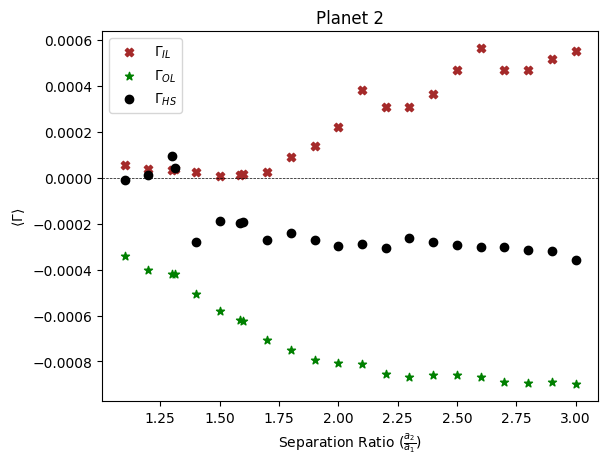

In [ ]:
plt.scatter(sep, inner2, label=r'$\Gamma_{IL}$', color='brown', marker='X')
plt.scatter(sep, outer2, label=r'$\Gamma_{OL}$',  color='green', marker='*')
plt.scatter(sep, (final2 - inner2 - outer2), label=r'$\Gamma_{HS}$', color='black', marker='o')
plt.axhline(y=0, linestyle='dashed', color='black', linewidth=0.5)

model3 = np.poly1d(np.polyfit(sep, inner2, 6))
model4 = np.poly1d(np.polyfit(sep, outer2, 6))
line = np.linspace(1.1, 3.0, 100)
#plt.plot(line, model3(line), color='red')
#plt.plot(line, model4(line), color='green')

plt.xlabel(r'Separation Ratio ($\frac{a_2}{a_1}$)')
plt.ylabel(r'$\langle \Gamma \rangle$')
plt.title('Planet 2')

plt.legend()

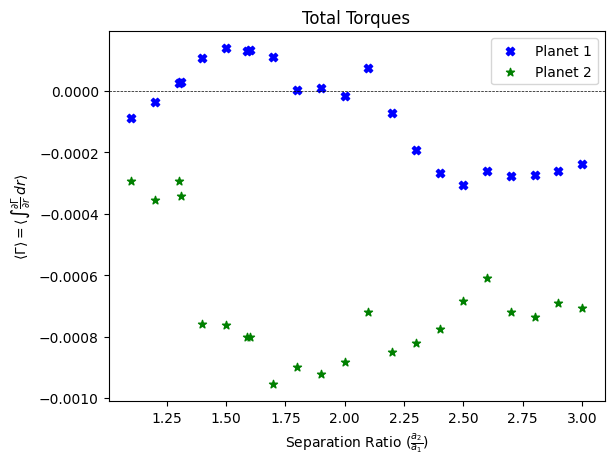

In [ ]:
plt.scatter(sep, final1, label='Planet 1', color='blue', marker='X')
plt.scatter(sep, final2, label='Planet 2', color='green', marker='*')
#plt.scatter(sep, final1+final2, label='Total Planet-Disk torque', color='red', marker='o')
plt.axhline(y=0, linestyle='dashed', color='black', linewidth=0.5)

model5 = np.poly1d(np.polyfit(sep, final1, 6))
model6 = np.poly1d(np.polyfit(sep, final2, 6))
model7 = np.poly1d(np.polyfit(sep, final1+final2, 6))
line = np.linspace(1.1, 3.0, 100)
#plt.plot(line, model5(line), color='blue')
#plt.plot(line, model6(line), color='green')
#plt.plot(line, model7(line), color='red')

plt.xlabel(r'Separation Ratio ($\frac{a_2}{a_1}$)')
plt.ylabel(r'$\langle \Gamma \rangle = \langle \int \frac{\partial \Gamma}{\partial r} \, dr \rangle$')
plt.title('Total Torques')

plt.legend(loc='upper right')

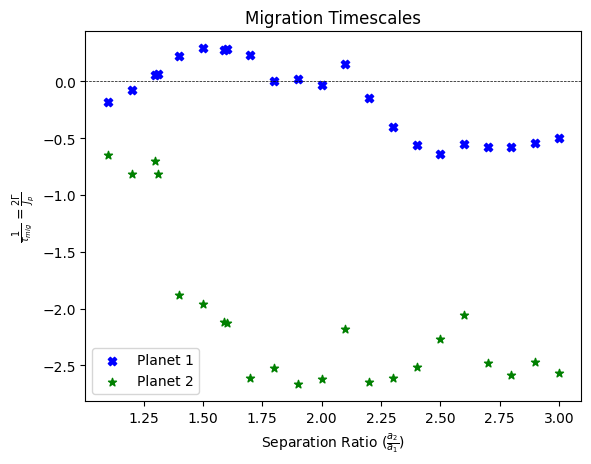

In [ ]:
def angular_momentum(mass, radius):
    return mass*radius*np.sqrt(1.0 / (radius**3))

migration1 = 2.0*final1/(angular_momentum(jupiter_mass, 1.0))
migration2 = np.array([])

for i in range(len(sep)):
    temp = 2.0*final2[i]/(angular_momentum(jupiter_mass, sep[i]))
    migration2 = np.append(migration2, temp)

plt.scatter(sep, migration1, label='Planet 1', color='blue', marker='X')
plt.scatter(sep, migration2, label='Planet 2', color='green', marker='*')
plt.axhline(y=0, linestyle='dashed', color='black', linewidth=0.5)

model8 = np.poly1d(np.polyfit(sep, migration1, 6))
model9 = np.poly1d(np.polyfit(sep, migration2, 6))
line = np.linspace(1.1, 3.0, 100)
#plt.plot(line, model8(line), color='blue')
#plt.plot(line, model9(line), color='green')

plt.xlabel(r'Separation Ratio ($\frac{a_2}{a_1}$)')
plt.ylabel(r'$\frac{1}{\tau_{mig}} = \frac{2 \Gamma}{J_{p}}$')
plt.title('Migration Timescales')

plt.legend()

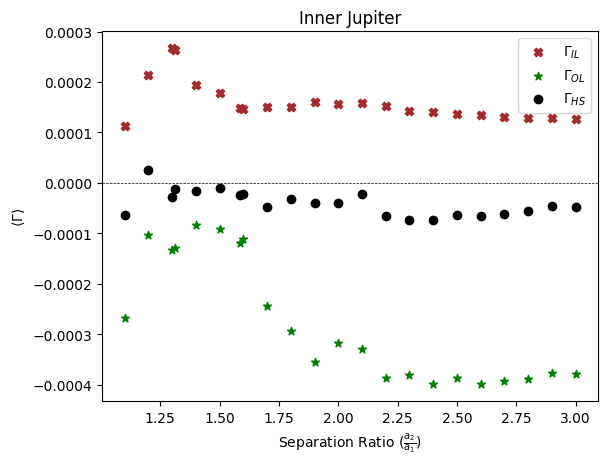

In [ ]:
plt.scatter(sep, innerj1, label=r'$\Gamma_{IL}$', color='brown', marker='X')
plt.scatter(sep, outerj1, label=r'$\Gamma_{OL}$',  color='green', marker='*')
plt.scatter(sep, (finalj1 - innerj1 - outerj1), label=r'$\Gamma_{HS}$', color='black', marker='o')
plt.axhline(y=0, linestyle='dashed', color='black', linewidth=0.5)

plt.xlabel(r'Separation Ratio ($\frac{a_2}{a_1}$)')
plt.ylabel(r'$\langle \Gamma \rangle$')
plt.title('Inner Jupiter')

plt.legend()

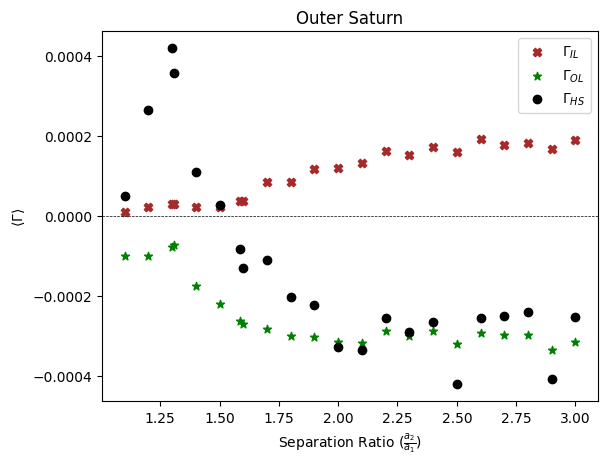

In [ ]:
plt.scatter(sep, inners2, label=r'$\Gamma_{IL}$', color='brown', marker='X')
plt.scatter(sep, outers2, label=r'$\Gamma_{OL}$',  color='green', marker='*')
plt.scatter(sep, (finals2 - inners2 - outers2), label=r'$\Gamma_{HS}$', color='black', marker='o')
plt.axhline(y=0, linestyle='dashed', color='black', linewidth=0.5)

plt.xlabel(r'Separation Ratio ($\frac{a_2}{a_1}$)')
plt.ylabel(r'$\langle \Gamma \rangle$')
plt.title('Outer Saturn')

plt.legend()

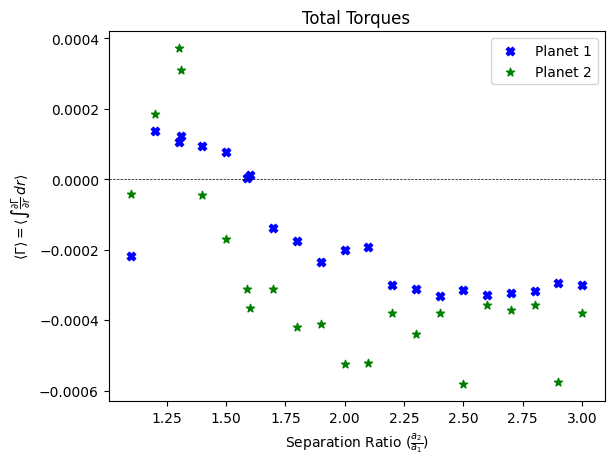

In [ ]:
plt.scatter(sep, finalj1, label='Inner Jupiter', color='blue', marker='X')
plt.scatter(sep, finals2, label='Outer Saturn', color='green', marker='*')
#plt.scatter(sep, finalsj1+finals2, label='Total Planet-Disk torque', color='red', marker='o')
plt.axhline(y=0, linestyle='dashed', color='black', linewidth=0.5)

plt.xlabel(r'Separation Ratio ($\frac{a_2}{a_1}$)')
plt.ylabel(r'$\langle \Gamma \rangle = \langle \int \frac{\partial \Gamma}{\partial r} \, dr \rangle$')
plt.title('Total Torques')

plt.legend(loc='upper right')

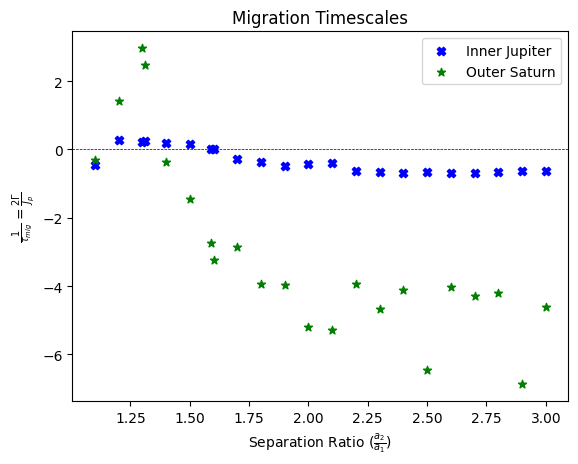

In [ ]:
migration1 = 2.0*finalj1/(angular_momentum(jupiter_mass, 1.0))
migration2 = np.array([])

for i in range(len(sep)):
    temp = 2.0*finals2[i]/(angular_momentum(saturn_mass, sep[i]))
    migration2 = np.append(migration2, temp)

plt.scatter(sep, migration1, label='Inner Jupiter', color='blue', marker='X')
plt.scatter(sep, migration2, label='Outer Saturn', color='green', marker='*')
plt.axhline(y=0, linestyle='dashed', color='black', linewidth=0.5)

model8 = np.poly1d(np.polyfit(sep, migration1, 6))
model9 = np.poly1d(np.polyfit(sep, migration2, 6))
line = np.linspace(1.1, 3.0, 100)
#plt.plot(line, model8(line), color='blue')
#plt.plot(line, model9(line), color='green')

plt.xlabel(r'Separation Ratio ($\frac{a_2}{a_1}$)')
plt.ylabel(r'$\frac{1}{\tau_{mig}} = \frac{2 \Gamma}{J_{p}}$')
plt.title('Migration Timescales')

plt.legend()

In [ ]:
file = input(f"Enter directory path for first separation ratio: ")
inner_sma = float(input(f'Enter the semimajor axis of the inner planet: '))
data1 = athena_read.athdf(file + f'/disk.out1.00600.athdf')
r1_c = data1.get('x1v')
phi1_c = data1.get('x2v')
shifted_dens_sum2 = 0

for i in range(600,800,1):
    data = athena_read.athdf(file + f'/disk.out1.00{i}.athdf')
    densp1 = data.get('dens')[0]
    phip1_c = data.get('x2v')
    time2p1 = data.get('Time')

    period1 = 2*np.pi*np.sqrt(inner_sma**3 /(1 + jupiter_mass))
    planet_phi = 2*(np.pi / period1)*(time2p1)
    
    coeff = planet_phi/np.pi
    k = np.floor(coeff/2)
    beta = ((coeff * np.pi) - 2*np.pi*k)
    index = np.where(phip1_c > beta)[0][0]

    dens = shift(densp1, (-1*index, 0), mode="wrap")

    shifted_dens_sum2 += dens
shift_dens_avg2 = shifted_dens_sum2 / len(range(600,800,1))

/tmp/ipykernel_751/3903732110.py:5: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(X, Y, shift_dens_avg2, norm='log', cmap = 'inferno')


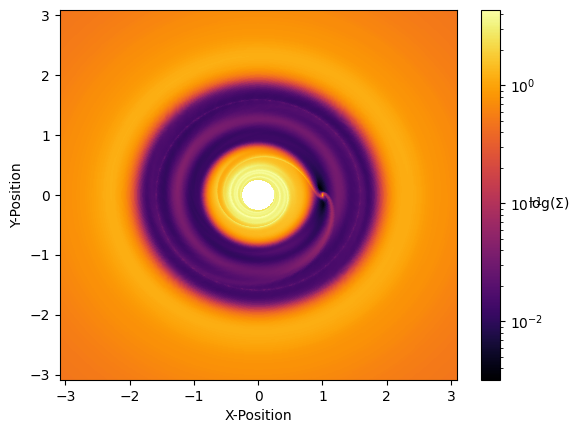

In [ ]:
R, PHI = np.meshgrid(r1_c, phi1_c)
X = R*np.cos(PHI)
Y = R*np.sin(PHI)

plt.pcolormesh(X, Y, shift_dens_avg2, norm='log', cmap = 'inferno')
plt.xlabel('X-Position')
plt.ylabel('Y-Position')
plt.xlim(-(1.587 + 1.5), 1.587 + 1.5)
plt.ylim(-(1.587 + 1.5), 1.587 + 1.5)
plt.colorbar().set_label(r'log($\Sigma$)', rotation=0)